# Logistic回归

Logistic回归（Logit回归）是统计学、机器学习中非常常用的解决分类问题的统计方法。

我们首先介绍二分类问题。

二分类问题指被解释变量为0/1两个取值的情况。比如，我们可能需要判断一封电子邮件是否为垃圾邮件（垃圾邮件=1，否则=0），或者我们需要预测哪些个体会参与到某个项目中（参与=1）、是否会上大学（上大学=1）。

令$\left(y_{i},x_{i}'\right)',i=1,...,N,x_{i}\in\mathbb{R}^{K}$，而其中$y_{i}$为**二元变量**（**binary variable**），即$y_{i}\in\left\{ 0,1\right\} $，那么其条件期望：$$\mathbb{E}\left(y_{i}|x_{i}\right)=1\cdot P\left(y_{i}|x_{i}\right)+0\cdot\left(1-P\left(y_{i}|x_{i}\right)\right)=P\left(y_{i}|x_{i}\right)$$即条件期望为给定$x_{i}，y_{i}=1$的条件概率。然而如果我们使用线性回归，线性函数$x_{i}'\beta$不能够保证一定在$\left(0,1\right)$区间范围以内，因而此时使用线性回归拟合上述条件期望就不再合适。

为了避免以上问题，我们可以将概率$P\left(y_{i}|x_{i}\right)$建模为一个概率分布，一个常用的假设是：$$P\left(y_{i}=1|x_{i},\beta\right)=F\left(x_{i}'\beta\right)=\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}$$由于函数$F\left(x\right)=\frac{e^{x}}{1+e^{x}}$为一个Logistic分布的分布函数，因而其函数值一定是单调的且在$\left(0,1\right)$之间的。以上模型我们通常称为**逻辑斯蒂回归**（**Logistic regression**）。

我们将$y_{i}=1$的概率与$y_{i}=0$的概率的比值成为**几率**（**odds**），那么根据以上设定，该模型的几率为：$$odds=\frac{P\left(y_{i}=1|x_{i},\beta\right)}{P\left(y_{i}=0|x_{i},\beta\right)}=\frac{\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}}{1-\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}}=e^{x_{i}'\beta}$$而**对数几率**（**log odds**，也称为**logit**）为：$$logit=\ln\left(odds\right)=x_{i}'\beta$$因而以上模型被称为**对数几率回归**（**Logit regression**）。

为了估计上述模型中的$\beta$，我们可以使用条件极大似然法。以上模型的条件密度函数为：$$f\left(y_{i}|x_{i},\beta\right)=\left[\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}\right]^{1\left\{ y_{i}=1\right\} }\left[\frac{1}{1+e^{x_{i}'\beta}}\right]^{1\left\{ y_{i}=0\right\} }$$因而极大似然函数为：$$L\left(\beta|y,x\right)=\sum_{i=1}^{N}\left[y_{i}\ln\left(\frac{e^{x_{i}'\beta}}{1+e^{x_{i}'\beta}}\right)+\left(1-y_{i}\right)\ln\left(\frac{1}{1+e^{x_{i}'\beta}}\right)\right]$$最大化以上似然函数，就可以得到$\beta$的一致估计$\hat{\beta}$。进而得到$p\left(x_{i}\right)=P\left(y_{i}=1|x_{i}\right)$，即给定$x_{i}，y_{i}=1$的概率的估计:$$\hat{p}_{i}\overset{\Delta}{=}\widehat{P\left(y_{i}=1|x_{i}\right)}=F\left(x_{i}'\hat{\beta}\right)$$

In [1]:
import pandas as pd
raw_data=pd.read_csv("csv/soep.csv")
raw_data.head()

,persnr,year,employment,chld6,chld16,age,income,husworkhour,husemployment,region,edu,husedu
0,9401,2008,[1] Employed 1,0,0,48,50682,1923,1,0,13.0,12.0
1,9401,2009,[1] Employed 1,0,0,49,45880,2078,1,0,13.0,12.0
2,9401,2010,[1] Employed 1,0,0,50,48690,2078,1,0,13.0,12.0
3,9401,2011,[1] Employed 1,0,0,51,52832,2494,1,0,13.0,12.0
4,9401,2012,[1] Employed 1,0,0,52,55790,2078,1,0,13.0,12.0


In [2]:
import numpy as np

data=raw_data.set_index(['persnr','year'])
data['log_income']=np.log(data['income'])
data['age2']=np.power(data['age'],2)
data=data.drop('income',axis=1)
region_dummy=pd.get_dummies(data['region'])
data=pd.concat([data,region_dummy], axis=1)
data=data.drop(['region','0'],axis=1)
data['employment']=data['employment']==data['employment'][0]
data.head()

employment  chld6  chld16  age  husworkhour  husemployment   edu  \
persnr year                                                                     
9401   2008        True      0       0   48         1923              1  13.0   
       2009        True      0       0   49         2078              1  13.0   
       2010        True      0       0   50         2078              1  13.0   
       2011        True      0       0   51         2494              1  13.0   
       2012        True      0       0   52         2078              1  13.0   

             husedu  log_income  age2  [1] West-Germany   1  
persnr year                                                  
9401   2008    12.0   10.833326  2304                     0  
       2009    12.0   10.733785  2401                     0  
       2010    12.0   10.793229  2500                     0  
       2011    12.0   10.874872  2601                     0  
       2012    12.0   10.929350  2704                     0

In [3]:
y=data['employment']
X=data.drop('employment',axis=1)
y.mean()

0.8260999254287845

In [4]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(penalty='none')
LR.fit(X,y)  ## 训练模型
LR.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[-1.06096666e+00, -2.81896152e-01,  1.86446253e-01,
         3.87155651e-04,  6.23513216e-02,  1.03962276e-01,
        -3.50542733e-02, -3.51938557e-01, -2.14296767e-03,
         4.67124110e-01]])

值得注意的是我们特地加了一个选项「penalty='none'」，即没有惩罚项，做普通的Logistic回归。默认情况会使用L2正则化，也可以选择L1正则化，这里需要注意。

模型训练好之后，当然可以计算预测概率：

In [5]:
LR.predict_proba(X)

array([[0.1285558 , 0.8714442 ],
       [0.12053127, 0.87946873],
       [0.12556214, 0.87443786],
       ...,
       [0.19748212, 0.80251788],
       [0.18488262, 0.81511738],
       [0.18197721, 0.81802279]])

注意以上的概率有两列，分别是按照可能的结果排序的（False,True）的概率值，我们希望得到True的概率，所以：

In [6]:
data['prob']=LR.predict_proba(X)[:,1]
data

employment  chld6  chld16  age  husworkhour  husemployment  \
persnr  year                                                               
9401    2008        True      0       0   48         1923              1   
        2009        True      0       0   49         2078              1   
        2010        True      0       0   50         2078              1   
        2011        True      0       0   51         2494              1   
        2012        True      0       0   52         2078              1   
...                  ...    ...     ...  ...          ...            ...   
8270802 2008        True      0       0   23         2078              1   
        2009        True      0       0   24         2078              1   
        2010        True      0       0   25         2078              1   
        2011        True      0       0   26         2078              1   
        2012        True      0       0   27         2078              1   

               edu  husedu  log_income  age2  [1] West-Germany   1      prob  
persnr  year                                                                  
9401    2008  13.0    12.0   10.833326  2304                     0  0.871444  
        2009  13.0    12.0   10.733785  2401                     0  0.879469  
        2010  13.0    12.0   10.793229  2500                     0  0.874438  
        2011  13.0    12.0   10.874872  2601                     0  0.885250  
        2012  13.0    12.0   10.929350  2704                     0  0.861595  
...            ...     ...         ...   ...                   ...       ...  
8270802 2008  11.5    11.5   10.264861   529                     0  0.764598  
        2009  11.5    11.5   10.079539   576                     0  0.790676  
        2010  11.5    11.5   10.103240   625                     0  0.802518  
        2011  11.5    11.5   10.090880   676                     0  0.815117  
        2012  11.5    11.5   10.242813   729                     0  0.818023  

[6705 rows x 12 columns]

In [7]:
data['pred']=LR.predict(X)
data

employment  chld6  chld16  age  husworkhour  husemployment  \
persnr  year                                                               
9401    2008        True      0       0   48         1923              1   
        2009        True      0       0   49         2078              1   
        2010        True      0       0   50         2078              1   
        2011        True      0       0   51         2494              1   
        2012        True      0       0   52         2078              1   
...                  ...    ...     ...  ...          ...            ...   
8270802 2008        True      0       0   23         2078              1   
        2009        True      0       0   24         2078              1   
        2010        True      0       0   25         2078              1   
        2011        True      0       0   26         2078              1   
        2012        True      0       0   27         2078              1   

               edu  husedu  log_income  age2  [1] West-Germany   1      prob  \
persnr  year                                                                   
9401    2008  13.0    12.0   10.833326  2304                     0  0.871444   
        2009  13.0    12.0   10.733785  2401                     0  0.879469   
        2010  13.0    12.0   10.793229  2500                     0  0.874438   
        2011  13.0    12.0   10.874872  2601                     0  0.885250   
        2012  13.0    12.0   10.929350  2704                     0  0.861595   
...            ...     ...         ...   ...                   ...       ...   
8270802 2008  11.5    11.5   10.264861   529                     0  0.764598   
        2009  11.5    11.5   10.079539   576                     0  0.790676   
        2010  11.5    11.5   10.103240   625                     0  0.802518   
        2011  11.5    11.5   10.090880   676                     0  0.815117   
        2012  11.5    11.5   10.242813   729                     0  0.818023   

              pred  
persnr  year        
9401    2008  True  
        2009  True  
        2010  True  
        2011  True  
        2012  True  
...            ...  
8270802 2008  True  
        2009  True  
        2010  True  
        2011  True  
        2012  True  

[6705 rows x 13 columns]

# Logistic回归的模型评价

## 常用的模型评价指标

对于Logit回归：类比于线性回归中的$R^{2}$，McFadden(1974)建议使用Pseudo $R^{2}$:$$R^{2}	=1-\frac{L\left(\hat{\beta}|y,x\right)}{L_{0}}
	=1-\frac{\sum_{i=1}^{N}\left[1\left\{ y_{i}=1\right\} \ln\left(\hat{p}_{i}\right)+1\left\{ y_{i}=0\right\} \ln\left(1-\hat{p}_{i}\right)\right]}{N\left[\bar{y}\ln\bar{y}+\left(1-\bar{y}\right)\ln\left(1-\bar{y}\right)\right]}$$

此外，为了进行预测分类，我们可以选定一个临界值$c$，并令预测值$\hat{y}_{i}=1\left\{ \hat{p}_{i}>c\right\}$ ，之后将样本分为四类：

* 真正（True Positive， TP）：$y_{i}=1,\hat{y}_{i}=1$;
* 假正（False Positive， FP）：$y_{i}=0,\hat{y}_{i}=1$;
* 真反（True Negative， TN）：$y_{i}=0,\hat{y}_{i}=0$;
* 假反（False Negative， FN）：$y_{i}=1,\hat{y}_{i}=0$。

使用以上四个分类分别定义：

* 查准率（precision），即所有预测为正的样本中，正确的比例：$$Precision=\frac{TP}{TP+FP}$$
* 查全率（或者召回率，recall），即所有正的样本中，正确的比例：$$Recall=\frac{TP}{TP+FN}$$
* 精度（accuracy），即所有样本中预测正确的比例：$$Accuracy=\frac{TP+TN}{TP+FP+TN+FN}$$
* F1度量，即查准率和查全率的调和平均：$$F1=\frac{2\times Precision\times Recall}{Precision+Recall}=\frac{1}{\frac{1}{2}\left(\frac{1}{Precision}+\frac{1}{Recall}\right)}$$

查准率和查全率之间通常存在着权衡：

* 比如，如果我们希望提高查准率，需减少预测为正的比例，需要较大的$c$，从而降低查全率。
* 使得查准率等于查全率的点称为平衡点（break-event point, BEP）。

In [8]:
TP=np.sum(data['employment'] & data['pred'])
TN=np.sum((~data['employment'] & (~data['pred'])))
FP=np.sum((~data['employment'] & (data['pred'])))
FN=np.sum((data['employment']) & (~data['pred']))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

TP= 5524
TN= 23
FP= 1143
FN= 15
查全率=敏感性= 0.9972919299512547
查准率= 0.8285585720713964
特异性= 0.01972555746140652


此外，我们还可以使用ROC曲线：

对于任意的临界值$c$，我们都可以定义：

* 敏感性（sensitivity）：观察到的正的样本中，预测正确的比例，即$$Sensitivity=Recall=\frac{TP}{TP+FN}$$
* 特异性（specificity）：观察到的反的样本中，预测正确的比例，即$$Specificity=\frac{TN}{TN+FP}$$

**受试者工作特征曲线**（receiver operating characteristic curve， **ROC curve**）：即当$c\in\left[0,1\right]$时，以$1-Specificity$作为横坐标，以$Sensitivity$作为纵坐标所画出来的图。

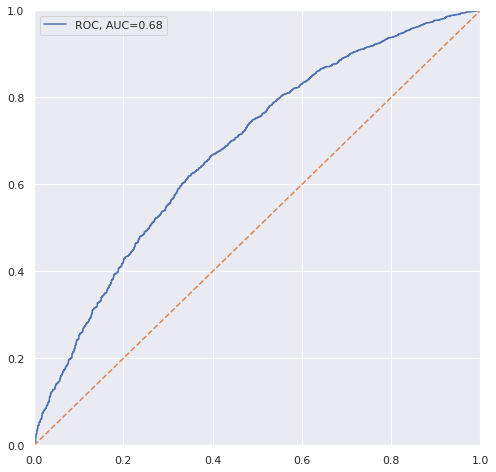

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(data['employment'], data['prob'])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

## 样本外预测指标

同样的，在预测问题中，我们应该更加关注样本外预测能力，我们可以通过划分训练集、测试集的方式计算模型样本外预测能力，或者

In [10]:
X['employment']=y
## 产生一个随机顺序，并排序，从而顺序是随机的
X['random_order']=np.random.random(X.shape[0])
X=X.sort_values(['random_order'])
X=X.drop('random_order', axis=1)
X

,,chld6,chld16,age,husworkhour,husemployment,edu,husedu,log_income,age2,[1] West-Germany 1,employment
persnr,year,,,,,,,,,,,
2904302,2010,0,0,52,0,0,11.0,10.5,11.194468,2704,0,False
5161404,2011,1,1,32,2494,1,12.0,15.0,10.064117,1024,1,True
655802,2008,0,1,49,2338,1,12.0,11.5,10.939905,2401,0,True
924802,2011,0,1,46,1974,1,11.5,14.0,10.842048,2116,0,False
85604,2012,0,1,39,2078,1,12.0,10.5,10.140179,1521,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5501302,2010,1,1,40,2182,1,11.5,11.5,9.904537,1600,1,True
1144004,2009,0,0,45,2026,1,11.5,11.5,10.769411,2025,0,True
2887701,2012,1,3,38,2338,1,14.5,10.5,10.332637,1444,0,True


In [11]:
from sklearn.model_selection import KFold
## 区分训练集和测试集
kf = KFold(n_splits=10)
## 使用训练集回归
CV_prob=np.array([])
for train, test in kf.split(X):
    X_train=X.iloc[train,:]
    X_test=X.iloc[test,:]
    # 先使用训练集训练模型
    logit=LogisticRegression(penalty='none').fit(X_train.drop('employment',axis=1),X_train['employment'])
    # 接下来在验证集上进行预测，得到预测概率
    pre_prob=logit.predict_proba(X_test.drop('employment',axis=1))[:,1]
    CV_prob=np.concatenate([CV_prob,pre_prob])
CV_prob

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.74042581, 0.76184325, 0.82471317, ..., 0.69843633, 0.96521121,
       0.80792808])

以$c=0.6$进行预测：

In [12]:
CV_pred=CV_prob>=0.6
CV_pred

array([ True,  True,  True, ...,  True,  True,  True])

计算指标：

In [13]:
TP=np.sum(X['employment'] & CV_pred)
TN=np.sum((~X['employment'] & (~CV_pred)))
FP=np.sum((~X['employment'] & (CV_pred)))
FN=np.sum((X['employment']) & (~CV_pred))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

TP= 5478
TN= 76
FP= 1090
FN= 61
查全率=敏感性= 0.9889871818017693
查准率= 0.8340438489646772
特异性= 0.06518010291595197


以及ROC曲线：

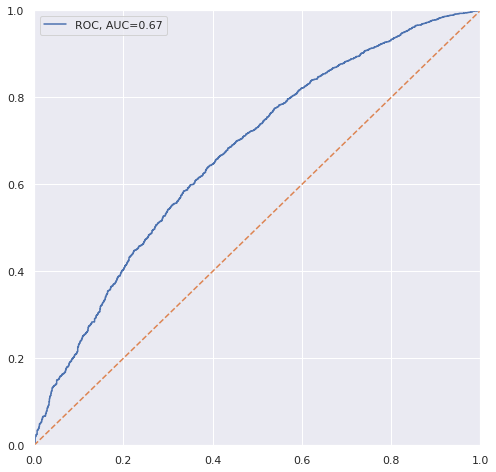

In [14]:
fpr, tpr, threshold = roc_curve(X['employment'], CV_prob)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# 多元Logistic

以上我们解决了预测目标为二分的情况（0/1），Logistic回归可以轻易的推广到多个选择的情况，即多元Logistic（multinomial Logistic）。

如果可供选择的选项有$J+1$种：$y\in\left\{ 0,1,2,...,J\right\}$ ，选取$y=0$为基准选项

给定特征$x$，假定选择的概率为：$$P\left(y=j|x\right)	=\frac{e^{x'\beta_{j}}}{1+\sum_{j=1}^{J}e^{x'\beta_{j}}},j=1,....,J
P\left(y=0|x\right)	=\frac{1}{1+\sum_{j=1}^{J}e^{x'\beta_{j}}}$$

此时，有$J$个\$beta_{j}$需要估计，我们同样可以使用极大似然估计对参数进行估计。

可以发现，以上介绍的Logistic回归实际上是$J=1$的一个特例，即一个简单的二元Logistic回归。

在Scikit-Learn中，使用多元Logistic回归的方法与二元的Logistic是一样的，只需要提供的$y$中有多于两个选项，就会自动帮我们做多元Logistic。

比如如下代码中我们使用教育情况、年龄、性别等特征预测每个人的雇主性质：

In [15]:
import pandas as pd
raw_data=pd.read_csv('csv/cfps_adult.csv')
raw_data=raw_data.loc[:,['cfps_birthy', 'cfps_gender', 'te4', 'qg2']]
raw_data.head()

,cfps_birthy,cfps_gender,te4,qg2
0,1969,0,-8,77
1,1966,1,-8,3
2,1981,1,-8,4
3,1990,0,-8,4
4,1988,0,-8,2


In [16]:
# 做一些简单清洗，只保留政府部门、事业单位、国有企业和私营企业
data=raw_data[(raw_data['qg2']>0) & (raw_data['qg2']<=4)]
# 生成年龄
data['age']=2014-data['cfps_birthy']
data['age2']=data['age']**2
data=data.drop('cfps_birthy',axis=1)
# 产生教育的虚拟变量
edu_dummies=pd.get_dummies(data['te4'],prefix='edu')
data=pd.concat([data, edu_dummies],axis=1)
data=data.drop('te4',axis=1)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,cfps_gender,qg2,age,age2,edu_-8,edu_-1,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6,edu_7
1,1,3,48,2304,1,0,0,0,0,0,0,0,0
2,1,4,33,1089,1,0,0,0,0,0,0,0,0
3,0,4,24,576,1,0,0,0,0,0,0,0,0
4,0,2,26,676,1,0,0,0,0,0,0,0,0
5,0,4,27,729,1,0,0,0,0,0,0,0,0


接下来可以直接使用如上的LogisticRegression：

In [17]:
LR=LogisticRegression(penalty='none').fit(data.drop('qg2',axis=1),data['qg2'])  ## 训练模型
LR.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 4.82497145e-02, -6.40432399e-02,  9.15340775e-04,
         1.04200257e-01, -2.13289756e-03, -2.38751229e-02,
        -7.61243314e-02, -1.27841075e-01, -4.10339873e-02,
         1.63988190e-02,  2.46027692e-02,  3.16086895e-03],
       [-5.67428539e-01, -1.14528513e-02,  2.10093994e-04,
         1.58799283e-01, -3.92784115e-03, -3.08808913e-02,
        -1.09849963e-01, -2.06757126e-01, -7.37984844e-02,
         3.39021110e-02,  5.51349309e-02,  6.53284296e-03],
       [ 5.12784123e-01, -9.36511932e-03,  6.05840763e-05,
         6.12031728e-02, -1.57236575e-03, -3.42760532e-02,
        -7.70692106e-02, -1.90005105e-01,  1.28448429e-03,
         5.24292992e-02,  2.94248509e-02,  5.27294466e-03],
       [ 6.39470122e-03,  8.48612105e-02, -1.18601885e-03,
        -3.24202713e-01,  7.63310445e-03,  8.90320675e-02,
         2.63043505e-01,  5.24603306e-01,  1.13547987e-01,
        -1.02730229e-01, -1.09162551e-01, -1.49666566e-02]])

以及预测概率，注意因为现在有4个选项，从而预测的概率有四列：

In [18]:
prob=LR.predict_proba(data.drop('qg2',axis=1))
prob

array([[0.06149215, 0.0821938 , 0.17503289, 0.68128116],
       [0.04711898, 0.06741485, 0.16685046, 0.71861571],
       [0.05645379, 0.13372268, 0.11906827, 0.69075526],
       ...,
       [0.05099351, 0.06954931, 0.17829339, 0.70116379],
       [0.05118214, 0.1274348 , 0.1116001 , 0.70978296],
       [0.04755183, 0.0675765 , 0.16853161, 0.71634005]])

可以使用如上概率计算各种指标，比如画ROC曲线：

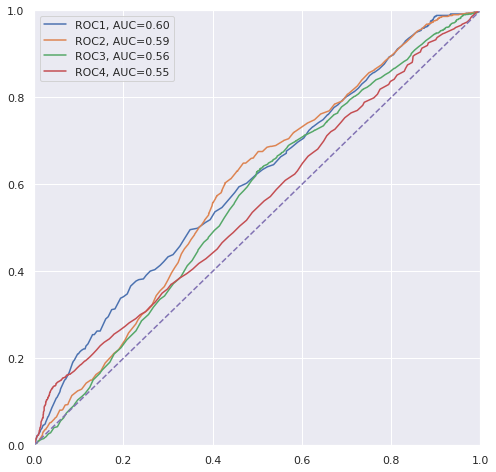

In [19]:
fpr1, tpr1, threshold1 = roc_curve(data['qg2']==1, prob[:,0])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(data['qg2']==2, prob[:,1])
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(data['qg2']==3, prob[:,2])
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(data['qg2']==4, prob[:,3])
roc_auc4 = auc(fpr4, tpr4)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr1,tpr1,label='ROC1, AUC=%.2f' % roc_auc1)
plt.plot(fpr2,tpr2,label='ROC2, AUC=%.2f' % roc_auc2)
plt.plot(fpr3,tpr3,label='ROC3, AUC=%.2f' % roc_auc3)
plt.plot(fpr4,tpr4,label='ROC4, AUC=%.2f' % roc_auc4)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()